# Machine Learning Model Comparison
# Author: AI/ML Intern - OWLAI
# Task 4: Build and Compare ML Models (Linear Regression vs Random Forest)
# Dataset: Boston Housing (Regression) or Titanic (Classification)

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings



# Settings

In [43]:
# Machine Learning Libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, classification_report,
                             roc_curve, roc_auc_score, precision_recall_curve)

In [44]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("All libraries imported successfully!")
print(f"Pandas: {pd.__version__}")
print(f"NumPy: {np.__version__}")

All libraries imported successfully!
Pandas: 2.3.3
NumPy: 1.26.4


In [45]:
df = pd.read_csv('train.csv')

print("Dataset loaded successfully!")
print(f"Dataset Shape: {df.shape}")
print(f"Features: {df.shape[1]}")
print(f"Samples: {df.shape[0]}")


Dataset loaded successfully!
Dataset Shape: (891, 12)
Features: 12
Samples: 891


In [46]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [48]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Target Variable Distribution:
Survived
0    549
1    342
Name: count, dtype: int64

Proportions:
Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


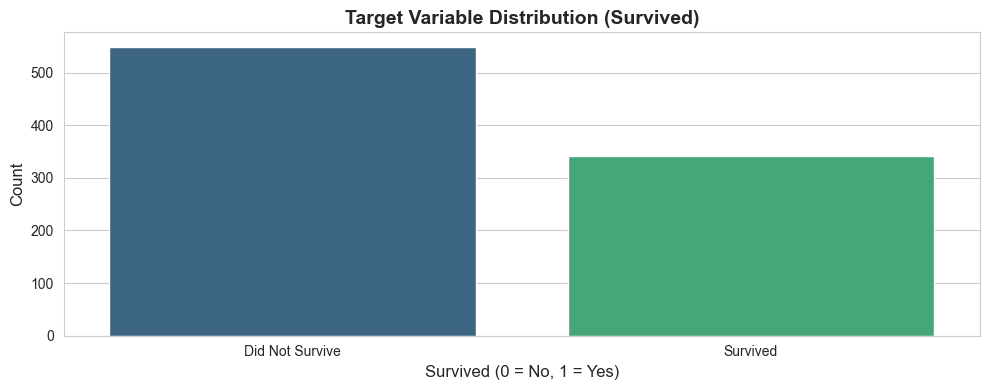

In [49]:
print("Target Variable Distribution:")
print("="*100)
print(df['Survived'].value_counts())
print("\nProportions:")
print(df['Survived'].value_counts(normalize=True))

plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='Survived', palette='viridis')
plt.title('Target Variable Distribution (Survived)', fontsize=14, fontweight='bold')
plt.xlabel('Survived (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['Did Not Survive', 'Survived'])
plt.tight_layout()
plt.show()

In [50]:
print("Missing Values Analysis:")
print("="*100)
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing,
    'Percentage': missing_percent
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
print(missing_df)

Missing Values Analysis:
          Missing_Count  Percentage
Cabin               687   77.104377
Age                 177   19.865320
Embarked              2    0.224467


In [79]:
missing_df

,Missing_Count,Percentage
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467


In [51]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
# Select features for modeling
features_to_use = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target = 'Survived'

# Create a copy for preprocessing
df_model = df[features_to_use + [target]].copy()

print(f"Selected Features: {features_to_use}")
print(f"Target Variable: {target}")
print(f"Dataset shape after selection: {df_model.shape}")

Selected Features: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
Target Variable: Survived
Dataset shape after selection: (891, 8)


# Handle Missing Values

In [53]:
print("Before handling missing values:")
print(df_model.isnull().sum())

# Fill missing Age with median
df_model['Age'].fillna(df_model['Age'].median(), inplace=True)

# Fill missing Fare with median
df_model['Fare'].fillna(df_model['Fare'].median(), inplace=True)

# Fill missing Embarked with mode
df_model['Embarked'].fillna(df_model['Embarked'].mode()[0], inplace=True)

print("\nAfter handling missing values:")
print(df_model.isnull().sum())
print("\nAll missing values handled successfully!")

Before handling missing values:
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Survived      0
dtype: int64

After handling missing values:
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64

All missing values handled successfully!


#  Feature Engineering

In [54]:
# Create FamilySize feature
df_model['FamilySize'] = df_model['SibSp'] + df_model['Parch'] + 1

# Create IsAlone feature
df_model['IsAlone'] = (df_model['FamilySize'] == 1).astype(int)

print("New Features Created:")
print("- FamilySize: Total family members aboard")
print("- IsAlone: Whether passenger was traveling alone")

# Display sample
df_model[['SibSp', 'Parch', 'FamilySize', 'IsAlone']].head(10)

New Features Created:
- FamilySize: Total family members aboard
- IsAlone: Whether passenger was traveling alone


,SibSp,Parch,FamilySize,IsAlone
0,1,0,2,0
1,1,0,2,0
2,0,0,1,1
3,1,0,2,0
4,0,0,1,1
5,0,0,1,1
6,0,0,1,1
7,3,1,5,0
8,0,2,3,0
9,1,0,2,0


In [55]:
le_sex = LabelEncoder()
df_model['Sex'] = le_sex.fit_transform(df_model['Sex'])

In [56]:
# One-Hot Encoding for Embarked
df_model = pd.get_dummies(df_model, columns=['Embarked'], prefix='Embarked', drop_first=True)

print("Categorical Encoding Completed:")
print(f"Sex: {le_sex.classes_} -> {[0, 1]}")
print("Embarked: One-Hot Encoded")

print("\nFinal Dataset Shape:", df_model.shape)
df_model.head()

Categorical Encoding Completed:
Sex: ['female' 'male'] -> [0, 1]
Embarked: One-Hot Encoded

Final Dataset Shape: (891, 11)


,Pclass,Sex,Age,SibSp,Parch,Fare,Survived,FamilySize,IsAlone,Embarked_Q,Embarked_S
0,3,1,22.0,1,0,7.2500,0,2,0,False,True
1,1,0,38.0,1,0,71.2833,1,2,0,False,False
2,3,0,26.0,0,0,7.9250,1,1,1,False,True
3,1,0,35.0,1,0,53.1000,1,2,0,False,True
4,3,1,35.0,0,0,8.0500,0,1,1,False,True


Correlation with Target Variable (Survived):
Survived      1.000000
Fare          0.257307
Parch         0.081629
FamilySize    0.016639
Embarked_Q    0.003650
SibSp        -0.035322
Age          -0.064910
Embarked_S   -0.149683
IsAlone      -0.203367
Pclass       -0.338481
Sex          -0.543351
Name: Survived, dtype: float64


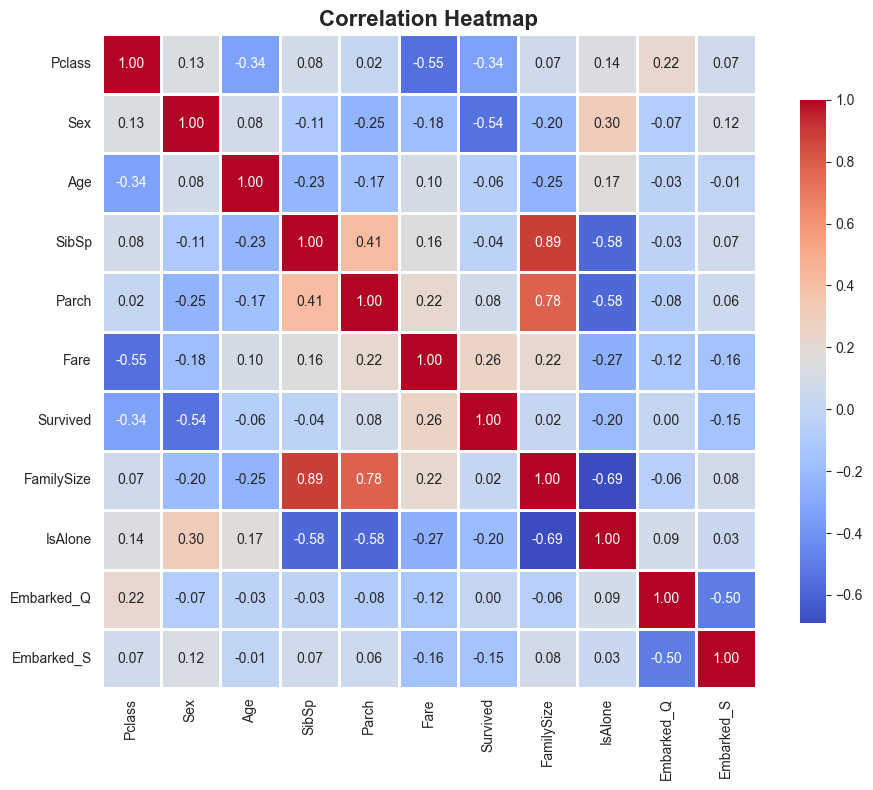

In [57]:
# Calculate correlation
correlation = df_model.corr()

print("Correlation with Target Variable (Survived):")
print("="*100)
target_corr = correlation['Survived'].sort_values(ascending=False)
print(target_corr)

# Visualize correlation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [58]:
# Separate features and target
X = df_model.drop('Survived', axis=1)
y = df_model['Survived']

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)
print("\nFeature columns:")
print(X.columns.tolist())

Features (X) shape: (891, 10)
Target (y) shape: (891,)

Feature columns:
['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'IsAlone', 'Embarked_Q', 'Embarked_S']


# Train-Test Split

In [59]:

# Split the data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train-Test Split:")
print("="*100)
print(f"Training set size: {X_train.shape[0]} samples ({(len(X_train)/len(X))*100:.1f}%)")
print(f"Testing set size: {X_test.shape[0]} samples ({(len(X_test)/len(X))*100:.1f}%)")
print(f"\nTraining set - Survived distribution:")
print(y_train.value_counts())
print(f"\nTesting set - Survived distribution:")
print(y_test.value_counts())

Train-Test Split:
Training set size: 712 samples (79.9%)
Testing set size: 179 samples (20.1%)

Training set - Survived distribution:
Survived
0    439
1    273
Name: count, dtype: int64

Testing set - Survived distribution:
Survived
0    110
1     69
Name: count, dtype: int64


# Feature Scaling

In [60]:
# Initialize scaler
scaler = StandardScaler()

# Fit on training data and transform both train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for better readability
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns, index=X_test.index)

print("Feature Scaling Completed!")
print("Method: StandardScaler (mean=0, std=1)")
print("\nScaled Training Data (first 5 rows):")
X_train_scaled.head()

Feature Scaling Completed!
Method: StandardScaler (mean=0, std=1)

Scaled Training Data (first 5 rows):


,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Embarked_Q,Embarked_S
692,0.829568,0.742427,-0.112078,-0.465084,-0.466183,0.513812,-0.556339,0.800346,-0.289333,0.611978
481,-0.370945,0.742427,-0.112078,-0.465084,-0.466183,-0.662563,-0.556339,0.800346,-0.289333,0.611978
527,-1.571457,0.742427,-0.112078,-0.465084,-0.466183,3.955399,-0.556339,0.800346,-0.289333,0.611978
855,0.829568,-1.346933,-0.879807,-0.465084,0.727782,-0.467874,0.073412,-1.249460,-0.289333,0.611978
801,-0.370945,-1.346933,0.118241,0.478335,0.727782,-0.115977,0.703162,-1.249460,-0.289333,0.611978


# Logistic Regression

In [61]:
print("="*100)
print("MODEL 1: LOGISTIC REGRESSION")
print("="*100)

MODEL 1: LOGISTIC REGRESSION


In [62]:
# Initialize Logistic Regression
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Train the model
log_reg.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred_lr = log_reg.predict(X_train_scaled)
y_test_pred_lr = log_reg.predict(X_test_scaled)

# Get prediction probabilities
y_test_pred_proba_lr = log_reg.predict_proba(X_test_scaled)[:, 1]

print("✓ Logistic Regression model trained successfully!")
print(f"Model parameters: {log_reg.get_params()}")

✓ Logistic Regression model trained successfully!
Model parameters: {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [80]:
# Get prediction probabilities
y_test_pred_proba_lr = log_reg.predict_proba(X_test_scaled)[:, 1]

print("✓ Logistic Regression model trained successfully!")
print(f"Model parameters: {log_reg.get_params()}")

✓ Logistic Regression model trained successfully!
Model parameters: {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [63]:
print("Logistic Regression - Training Set Performance:")
print("="*100)

# Calculate metrics
train_accuracy_lr = accuracy_score(y_train, y_train_pred_lr)
train_precision_lr = precision_score(y_train, y_train_pred_lr)
train_recall_lr = recall_score(y_train, y_train_pred_lr)
train_f1_lr = f1_score(y_train, y_train_pred_lr)

print(f"Accuracy:  {train_accuracy_lr:.4f} ({train_accuracy_lr*100:.2f}%)")
print(f"Precision: {train_precision_lr:.4f} ({train_precision_lr*100:.2f}%)")
print(f"Recall:    {train_recall_lr:.4f} ({train_recall_lr*100:.2f}%)")
print(f"F1-Score:  {train_f1_lr:.4f} ({train_f1_lr*100:.2f}%)")

Logistic Regression - Training Set Performance:
Accuracy:  0.8006 (80.06%)
Precision: 0.7569 (75.69%)
Recall:    0.7070 (70.70%)
F1-Score:  0.7311 (73.11%)


In [64]:
print("Logistic Regression - Testing Set Performance:")
print("="*100)

# Calculate metrics
test_accuracy_lr = accuracy_score(y_test, y_test_pred_lr)
test_precision_lr = precision_score(y_test, y_test_pred_lr)
test_recall_lr = recall_score(y_test, y_test_pred_lr)
test_f1_lr = f1_score(y_test, y_test_pred_lr)

print(f"Accuracy:  {test_accuracy_lr:.4f} ({test_accuracy_lr*100:.2f}%)")
print(f"Precision: {test_precision_lr:.4f} ({test_precision_lr*100:.2f}%)")
print(f"Recall:    {test_recall_lr:.4f} ({test_recall_lr*100:.2f}%)")
print(f"F1-Score:  {test_f1_lr:.4f} ({test_f1_lr*100:.2f}%)")

Logistic Regression - Testing Set Performance:
Accuracy:  0.8045 (80.45%)
Precision: 0.7833 (78.33%)
Recall:    0.6812 (68.12%)
F1-Score:  0.7287 (72.87%)


Confusion Matrix - Logistic Regression:
[[97 13]
 [22 47]]


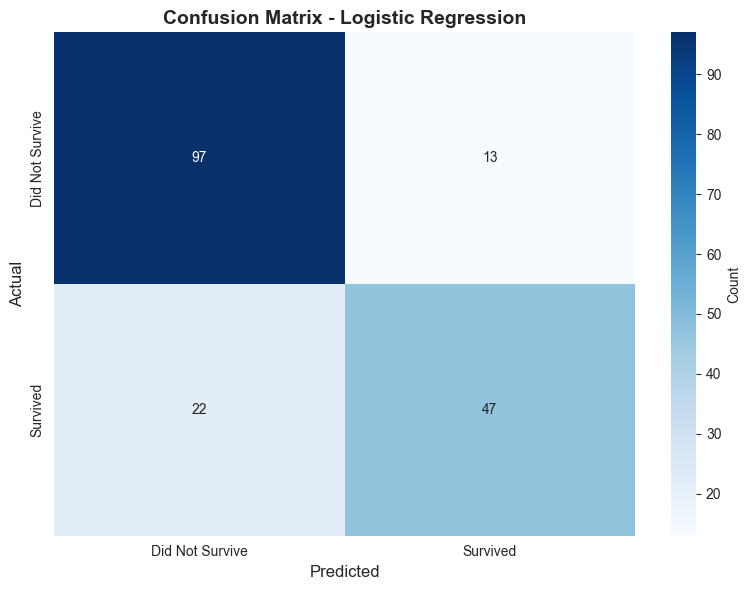


True Negatives (TN): 97
False Positives (FP): 13
False Negatives (FN): 22
True Positives (TP): 47


In [65]:
# Calculate confusion matrix
cm_lr = confusion_matrix(y_test, y_test_pred_lr)

print("Confusion Matrix - Logistic Regression:")
print(cm_lr)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Did Not Survive', 'Survived'],
            yticklabels=['Did Not Survive', 'Survived'],
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix - Logistic Regression', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.tight_layout()
plt.show()

print(f"\nTrue Negatives (TN): {cm_lr[0, 0]}")
print(f"False Positives (FP): {cm_lr[0, 1]}")
print(f"False Negatives (FN): {cm_lr[1, 0]}")
print(f"True Positives (TP): {cm_lr[1, 1]}")

In [66]:
print("Classification Report - Logistic Regression:")
print("="*100)
print(classification_report(y_test, y_test_pred_lr, 
                          target_names=['Did Not Survive', 'Survived']))

Classification Report - Logistic Regression:
                 precision    recall  f1-score   support

Did Not Survive       0.82      0.88      0.85       110
       Survived       0.78      0.68      0.73        69

       accuracy                           0.80       179
      macro avg       0.80      0.78      0.79       179
   weighted avg       0.80      0.80      0.80       179



In [67]:
print("="*100)
print("MODEL 2: RANDOM FOREST CLASSIFIER")
print("="*100)

# Initialize Random Forest (using original unscaled data)
rf_clf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2
)

# Train the model
rf_clf.fit(X_train, y_train)

# Make predictions
y_train_pred_rf = rf_clf.predict(X_train)
y_test_pred_rf = rf_clf.predict(X_test)

# Get prediction probabilities
y_test_pred_proba_rf = rf_clf.predict_proba(X_test)[:, 1]

print("✓ Random Forest model trained successfully!")
print(f"Model parameters: {rf_clf.get_params()}")

MODEL 2: RANDOM FOREST CLASSIFIER
✓ Random Forest model trained successfully!
Model parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [68]:
print("Random Forest - Training Set Performance:")
print("="*100)

# Calculate metrics
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
train_precision_rf = precision_score(y_train, y_train_pred_rf)
train_recall_rf = recall_score(y_train, y_train_pred_rf)
train_f1_rf = f1_score(y_train, y_train_pred_rf)

print(f"Accuracy:  {train_accuracy_rf:.4f} ({train_accuracy_rf*100:.2f}%)")
print(f"Precision: {train_precision_rf:.4f} ({train_precision_rf*100:.2f}%)")
print(f"Recall:    {train_recall_rf:.4f} ({train_recall_rf*100:.2f}%)")
print(f"F1-Score:  {train_f1_rf:.4f} ({train_f1_rf*100:.2f}%)")

Random Forest - Training Set Performance:
Accuracy:  0.9129 (91.29%)
Precision: 0.9342 (93.42%)
Recall:    0.8315 (83.15%)
F1-Score:  0.8798 (87.98%)


# Random Forest - Testing Performance

In [69]:
print("Random Forest - Testing Set Performance:")
print("="*100)

# Calculate metrics
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
test_precision_rf = precision_score(y_test, y_test_pred_rf)
test_recall_rf = recall_score(y_test, y_test_pred_rf)
test_f1_rf = f1_score(y_test, y_test_pred_rf)

print(f"Accuracy:  {test_accuracy_rf:.4f} ({test_accuracy_rf*100:.2f}%)")
print(f"Precision: {test_precision_rf:.4f} ({test_precision_rf*100:.2f}%)")
print(f"Recall:    {test_recall_rf:.4f} ({test_recall_rf*100:.2f}%)")
print(f"F1-Score:  {test_f1_rf:.4f} ({test_f1_rf*100:.2f}%)")

Random Forest - Testing Set Performance:
Accuracy:  0.7989 (79.89%)
Precision: 0.7797 (77.97%)
Recall:    0.6667 (66.67%)
F1-Score:  0.7188 (71.88%)


# Random Forest - Confusion Matrix

Confusion Matrix - Random Forest:
[[97 13]
 [23 46]]


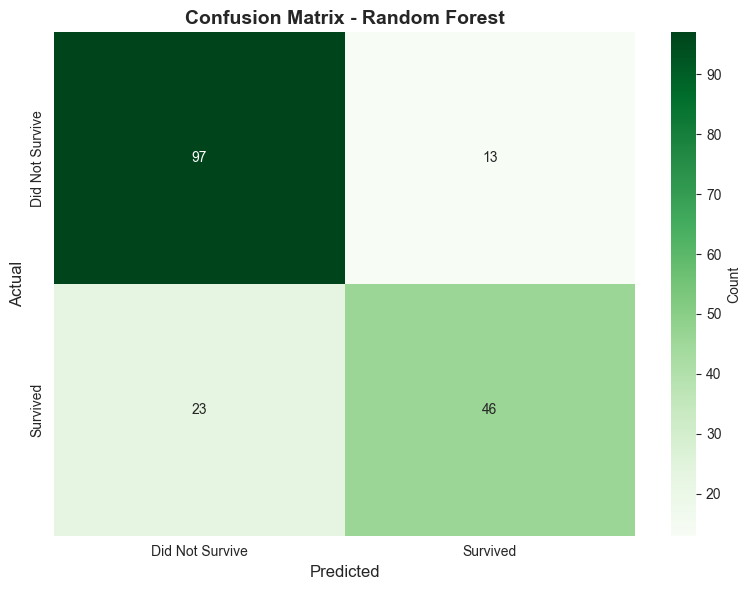


True Negatives (TN): 97
False Positives (FP): 13
False Negatives (FN): 23
True Positives (TP): 46


In [70]:
# Calculate confusion matrix
cm_rf = confusion_matrix(y_test, y_test_pred_rf)

print("Confusion Matrix - Random Forest:")
print(cm_rf)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Did Not Survive', 'Survived'],
            yticklabels=['Did Not Survive', 'Survived'],
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix - Random Forest', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.tight_layout()
plt.show()

print(f"\nTrue Negatives (TN): {cm_rf[0, 0]}")
print(f"False Positives (FP): {cm_rf[0, 1]}")
print(f"False Negatives (FN): {cm_rf[1, 0]}")
print(f"True Positives (TP): {cm_rf[1, 1]}")

# Random Forest - Classification Report

Feature Importance - Random Forest:
      Feature  Importance
1         Sex    0.339981
5        Fare    0.222128
2         Age    0.173122
0      Pclass    0.113796
6  FamilySize    0.053276
9  Embarked_S    0.027120
3       SibSp    0.024937
4       Parch    0.020383
7     IsAlone    0.014339
8  Embarked_Q    0.010918


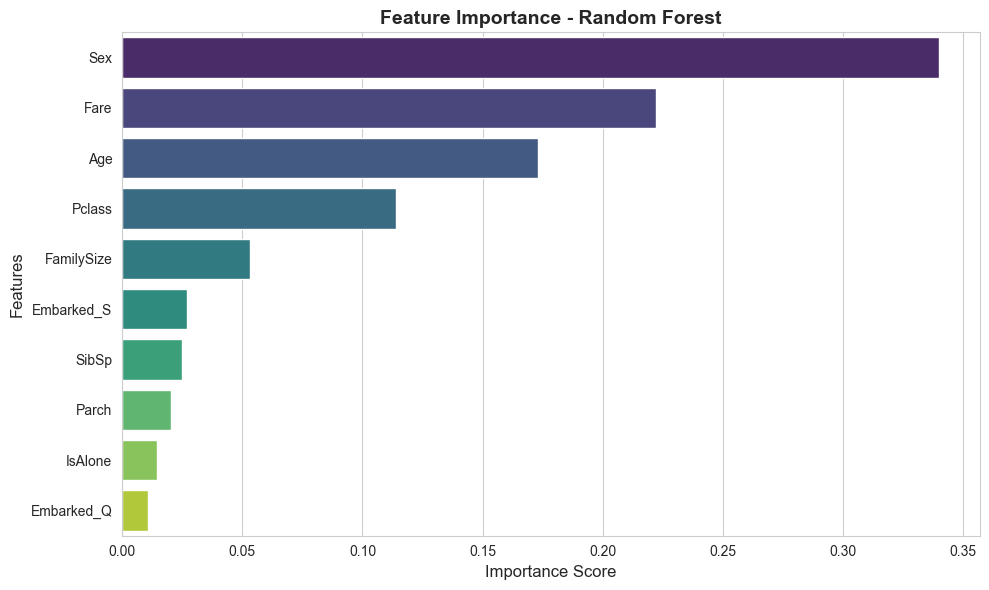

In [71]:
# Get feature importances
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_clf.feature_importances_
}).sort_values('Importance', ascending=False)

print("Feature Importance - Random Forest:")
print("="*100)
print(feature_importance)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance - Random Forest', fontsize=14, fontweight='bold')
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()
plt.show()

# Model Comparison - Metrics Table

In [72]:

print("="*100)
print("MODEL COMPARISON - PERFORMANCE METRICS")
print("="*100)

# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Logistic Regression (Train)': [
        f"{train_accuracy_lr:.4f}",
        f"{train_precision_lr:.4f}",
        f"{train_recall_lr:.4f}",
        f"{train_f1_lr:.4f}"
    ],
    'Logistic Regression (Test)': [
        f"{test_accuracy_lr:.4f}",
        f"{test_precision_lr:.4f}",
        f"{test_recall_lr:.4f}",
        f"{test_f1_lr:.4f}"
    ],
    'Random Forest (Train)': [
        f"{train_accuracy_rf:.4f}",
        f"{train_precision_rf:.4f}",
        f"{train_recall_rf:.4f}",
        f"{train_f1_rf:.4f}"
    ],
    'Random Forest (Test)': [
        f"{test_accuracy_rf:.4f}",
        f"{test_precision_rf:.4f}",
        f"{test_recall_rf:.4f}",
        f"{test_f1_rf:.4f}"
    ]
})

print(comparison_df.to_string(index=False))

MODEL COMPARISON - PERFORMANCE METRICS
   Metric Logistic Regression (Train) Logistic Regression (Test) Random Forest (Train) Random Forest (Test)
 Accuracy                      0.8006                     0.8045                0.9129               0.7989
Precision                      0.7569                     0.7833                0.9342               0.7797
   Recall                      0.7070                     0.6812                0.8315               0.6667
 F1-Score                      0.7311                     0.7287                0.8798               0.7188


# Prepare data for visualization

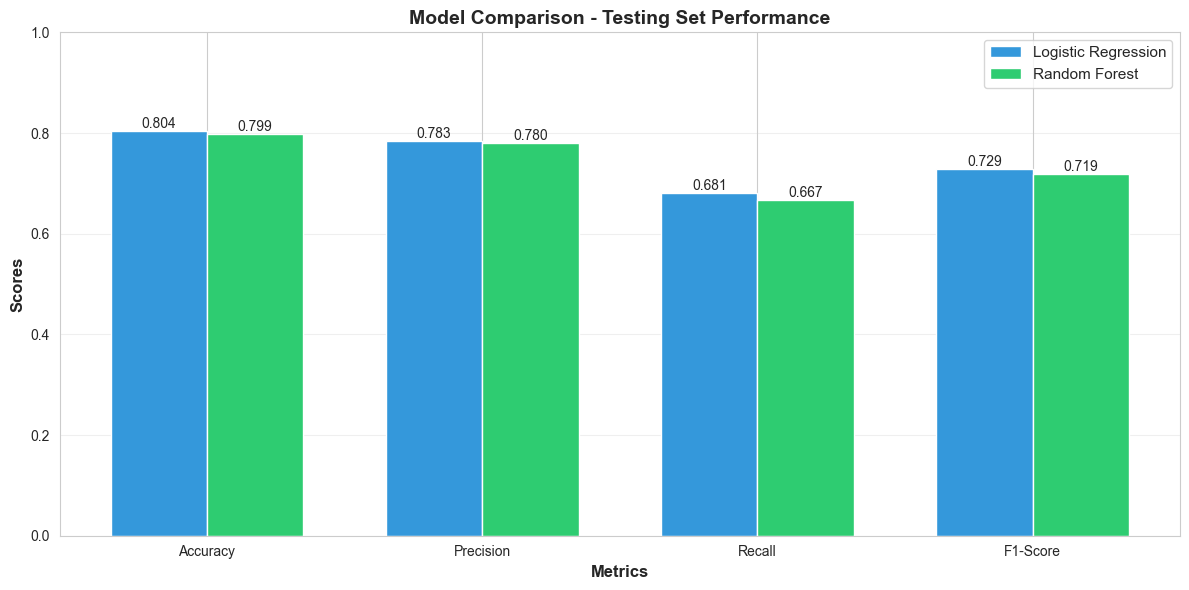

In [73]:

# Prepare data for visualization
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
lr_scores = [test_accuracy_lr, test_precision_lr, test_recall_lr, test_f1_lr]
rf_scores = [test_accuracy_rf, test_precision_rf, test_recall_rf, test_f1_rf]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, lr_scores, width, label='Logistic Regression', color='#3498db')
bars2 = ax.bar(x + width/2, rf_scores, width, label='Random Forest', color='#2ecc71')

ax.set_xlabel('Metrics', fontsize=12, fontweight='bold')
ax.set_ylabel('Scores', fontsize=12, fontweight='bold')
ax.set_title('Model Comparison - Testing Set Performance', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend(fontsize=11)
ax.set_ylim([0, 1.0])
ax.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# ROC Curve Comparison

AUC Score - Logistic Regression: 0.8502
AUC Score - Random Forest: 0.8377


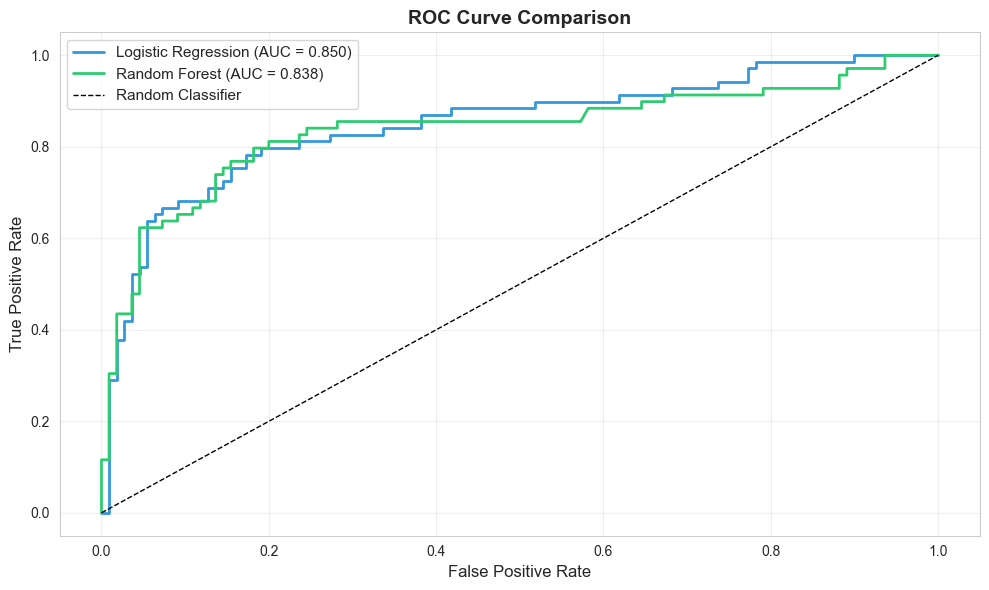

In [74]:

# Calculate ROC curves
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_test_pred_proba_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_test_pred_proba_rf)

# Calculate AUC scores
auc_lr = roc_auc_score(y_test, y_test_pred_proba_lr)
auc_rf = roc_auc_score(y_test, y_test_pred_proba_rf)

print(f"AUC Score - Logistic Regression: {auc_lr:.4f}")
print(f"AUC Score - Random Forest: {auc_rf:.4f}")

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.3f})', 
         linewidth=2, color='#3498db')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.3f})', 
         linewidth=2, color='#2ecc71')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier', linewidth=1)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve Comparison', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

#  Precision-Recall Curve

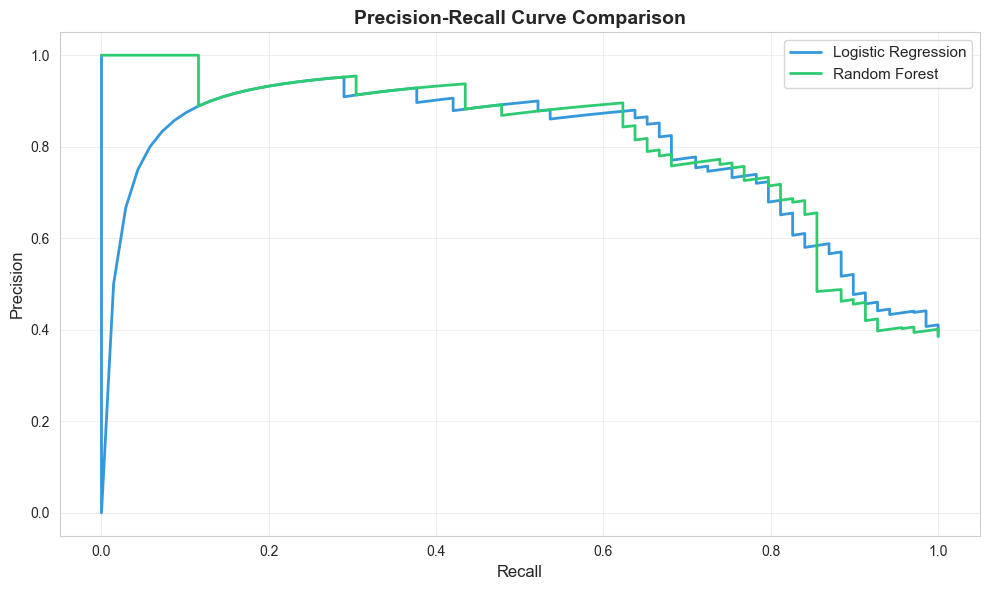

In [75]:

# Calculate Precision-Recall curves
precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_test_pred_proba_lr)
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_test_pred_proba_rf)

# Plot Precision-Recall curves
plt.figure(figsize=(10, 6))
plt.plot(recall_lr, precision_lr, label='Logistic Regression', 
         linewidth=2, color='#3498db')
plt.plot(recall_rf, precision_rf, label='Random Forest', 
         linewidth=2, color='#2ecc71')
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Precision-Recall Curve Comparison', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Cross-Validation Comparison

Cross-Validation Analysis (5-Fold):

Logistic Regression CV Scores: [0.76923077 0.76223776 0.81690141 0.81690141 0.80985915]
Mean CV Score: 0.7950 (+/- 0.0483)

Random Forest CV Scores: [0.78321678 0.78321678 0.85211268 0.84507042 0.84507042]
Mean CV Score: 0.8217 (+/- 0.0631)


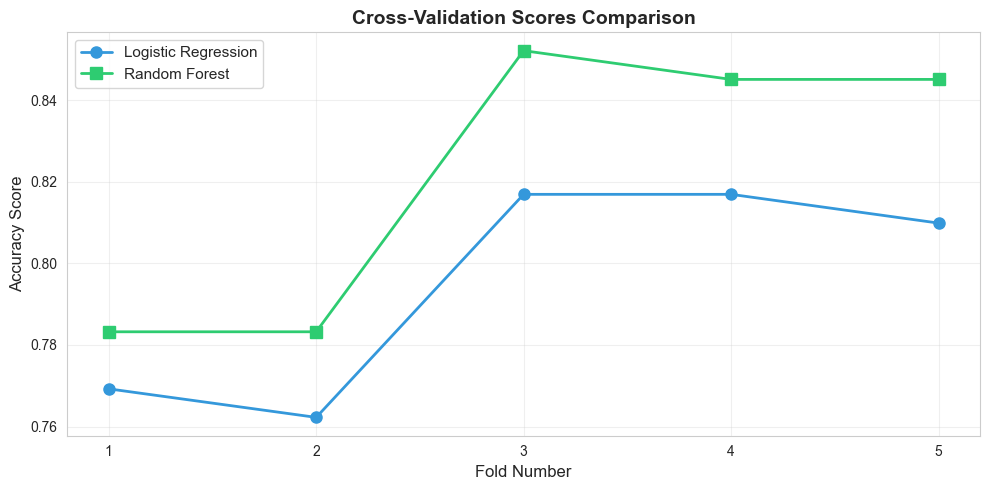

In [76]:
print("Cross-Validation Analysis (5-Fold):")
print("="*100)

# Logistic Regression CV
cv_scores_lr = cross_val_score(log_reg, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"\nLogistic Regression CV Scores: {cv_scores_lr}")
print(f"Mean CV Score: {cv_scores_lr.mean():.4f} (+/- {cv_scores_lr.std() * 2:.4f})")

# Random Forest CV
cv_scores_rf = cross_val_score(rf_clf, X_train, y_train, cv=5, scoring='accuracy')
print(f"\nRandom Forest CV Scores: {cv_scores_rf}")
print(f"Mean CV Score: {cv_scores_rf.mean():.4f} (+/- {cv_scores_rf.std() * 2:.4f})")

# Visualize CV scores
plt.figure(figsize=(10, 5))
plt.plot(range(1, 6), cv_scores_lr, marker='o', label='Logistic Regression', 
         linewidth=2, markersize=8, color='#3498db')
plt.plot(range(1, 6), cv_scores_rf, marker='s', label='Random Forest', 
         linewidth=2, markersize=8, color='#2ecc71')
plt.xlabel('Fold Number', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)
plt.title('Cross-Validation Scores Comparison', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.xticks(range(1, 6))
plt.tight_layout()
plt.show()

# Overfitting Analysis

Overfitting Analysis:

Logistic Regression:
Training Accuracy:   0.8006
Testing Accuracy:    0.8045
Difference:          -0.0039
Status: ✓ Good generalization (minimal overfitting)

Random Forest:
Training Accuracy:   0.9129
Testing Accuracy:    0.7989
Difference:          0.1140
Status: ✗ Significant overfitting


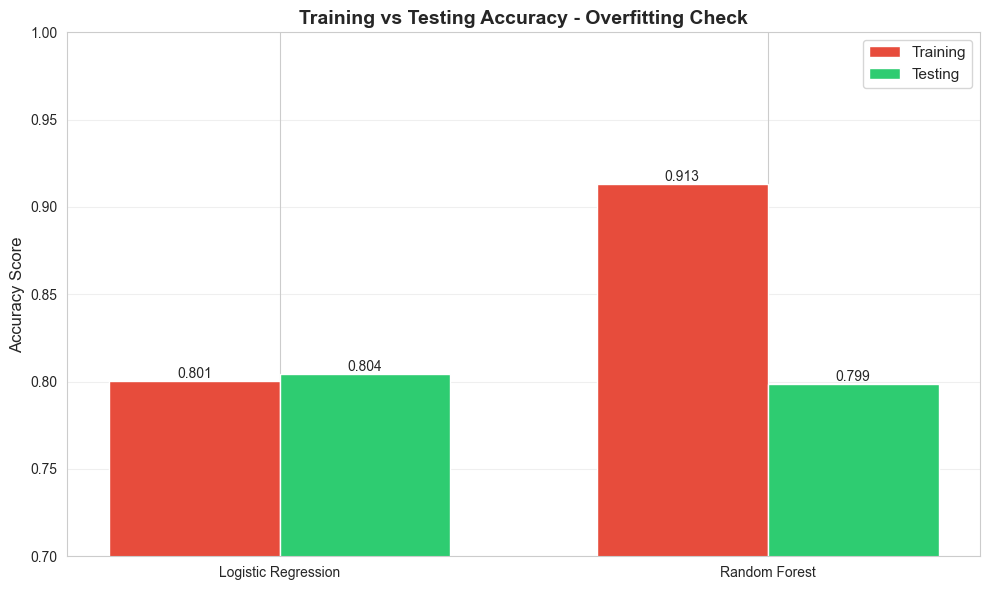

In [77]:
print("Overfitting Analysis:")
print("="*100)

# Calculate differences
lr_overfit = train_accuracy_lr - test_accuracy_lr
rf_overfit = train_accuracy_rf - test_accuracy_rf

print("\nLogistic Regression:")
print(f"Training Accuracy:   {train_accuracy_lr:.4f}")
print(f"Testing Accuracy:    {test_accuracy_lr:.4f}")
print(f"Difference:          {lr_overfit:.4f}")
if lr_overfit < 0.05:
    print("Status: ✓ Good generalization (minimal overfitting)")
elif lr_overfit < 0.10:
    print("Status: ⚠ Slight overfitting")
else:
    print("Status: ✗ Significant overfitting")

print("\nRandom Forest:")
print(f"Training Accuracy:   {train_accuracy_rf:.4f}")
print(f"Testing Accuracy:    {test_accuracy_rf:.4f}")
print(f"Difference:          {rf_overfit:.4f}")
if rf_overfit < 0.05:
    print("Status: ✓ Good generalization (minimal overfitting)")
elif rf_overfit < 0.10:
    print("Status: ⚠ Slight overfitting")
else:
    print("Status: ✗ Significant overfitting")

# Visualize
labels = ['Logistic Regression', 'Random Forest']
train_scores = [train_accuracy_lr, train_accuracy_rf]
test_scores = [test_accuracy_lr, test_accuracy_rf]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, train_scores, width, label='Training', color='#e74c3c')
bars2 = ax.bar(x + width/2, test_scores, width, label='Testing', color='#2ecc71')

ax.set_ylabel('Accuracy Score', fontsize=12)
ax.set_title('Training vs Testing Accuracy - Overfitting Check', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(fontsize=11)
ax.set_ylim([0.7, 1.0])
ax.grid(axis='y', alpha=0.3)

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Final Model Recommendation

In [82]:
print("\n" + "="*100)
print("FINAL MODEL RECOMMENDATION")
print("="*100)

# Determine best model
if test_f1_rf > test_f1_lr:
    best_model = "Random Forest"
    best_f1 = test_f1_rf
    best_accuracy = test_accuracy_rf
else:
    best_model = "Logistic Regression"
    best_f1 = test_f1_lr
    best_accuracy = test_accuracy_lr

print(f"\n🏆 RECOMMENDED MODEL: {best_model}")
print(f"\nReason: Highest F1-Score on test set")
print(f"Test Accuracy: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")
print(f"Test F1-Score: {best_f1:.4f}")

print("\n" + "-"*100)
print("MODEL CHARACTERISTICS:")
print("-"*100)

print("\nLogistic Regression:")
print("  ✓ Faster training and prediction")
print("  ✓ More interpretable")
print("  ✓ Lower computational cost")
print("  ✓ Good for linear relationships")
print(f"  • Test Accuracy: {test_accuracy_lr:.4f}")
print(f"  • Test F1-Score: {test_f1_lr:.4f}")

print("\nRandom Forest:")
print("  ✓ Handles non-linear relationships")
print("  ✓ Provides feature importance")
print("  ✓ More robust to outliers")
print("  ✓ Generally better performance")
print(f"  • Test Accuracy: {test_accuracy_rf:.4f}")
print(f"  • Test F1-Score: {test_f1_rf:.4f}")

print("\n" + "="*100)


FINAL MODEL RECOMMENDATION

🏆 RECOMMENDED MODEL: Logistic Regression

Reason: Highest F1-Score on test set
Test Accuracy: 0.8045 (80.45%)
Test F1-Score: 0.7287

----------------------------------------------------------------------------------------------------
MODEL CHARACTERISTICS:
----------------------------------------------------------------------------------------------------

Logistic Regression:
  ✓ Faster training and prediction
  ✓ More interpretable
  ✓ Lower computational cost
  ✓ Good for linear relationships
  • Test Accuracy: 0.8045
  • Test F1-Score: 0.7287

Random Forest:
  ✓ Handles non-linear relationships
  ✓ Provides feature importance
  ✓ More robust to outliers
  ✓ Generally better performance
  • Test Accuracy: 0.7989
  • Test F1-Score: 0.7188



In [83]:
print("\n" + "="*100)
print("COMPREHENSIVE RESULTS SUMMARY")
print("="*100)

summary_results = {
    'Model': ['Logistic Regression', 'Random Forest'],
    'Train_Accuracy': [f"{train_accuracy_lr:.4f}", f"{train_accuracy_rf:.4f}"],
    'Test_Accuracy': [f"{test_accuracy_lr:.4f}", f"{test_accuracy_rf:.4f}"],
    'Train_Precision': [f"{train_precision_lr:.4f}", f"{train_precision_rf:.4f}"],
    'Test_Precision': [f"{test_precision_lr:.4f}", f"{test_precision_rf:.4f}"],
    'Train_Recall': [f"{train_recall_lr:.4f}", f"{train_recall_rf:.4f}"],
    'Test_Recall': [f"{test_recall_lr:.4f}", f"{test_recall_rf:.4f}"],
    'Train_F1': [f"{train_f1_lr:.4f}", f"{train_f1_rf:.4f}"],
    'Test_F1': [f"{test_f1_lr:.4f}", f"{test_f1_rf:.4f}"],
    'AUC': [f"{auc_lr:.4f}", f"{auc_rf:.4f}"],
    'CV_Mean': [f"{cv_scores_lr.mean():.4f}", f"{cv_scores_rf.mean():.4f}"],
    'Overfit_Gap': [f"{lr_overfit:.4f}", f"{rf_overfit:.4f}"]
}

summary_df = pd.DataFrame(summary_results)
print(summary_df.to_string(index=False))

print("\n" + "="*100)
print("PROJECT COMPLETED SUCCESSFULLY!")
print("="*100)


COMPREHENSIVE RESULTS SUMMARY
              Model Train_Accuracy Test_Accuracy Train_Precision Test_Precision Train_Recall Test_Recall Train_F1 Test_F1    AUC CV_Mean Overfit_Gap
Logistic Regression         0.8006        0.8045          0.7569         0.7833       0.7070      0.6812   0.7311  0.7287 0.8502  0.7950     -0.0039
      Random Forest         0.9129        0.7989          0.9342         0.7797       0.8315      0.6667   0.8798  0.7188 0.8377  0.8217      0.1140

PROJECT COMPLETED SUCCESSFULLY!
